In [1]:
%matplotlib inline

In [2]:
#!pip install cartopy
#import cartopy
#!pip install --allow-external basemap --allow-unverified basemap basemap
#!pip install https://github.com/matplotlib/basemap/archive/v1.0.7rel.tar.gz
#from mpl_toolkits.basemap import Basemap

# NOTE: have to do conda install cartopy
#   make sure its the right enviornment!
import cartopy
import matplotlib.pyplot as plt

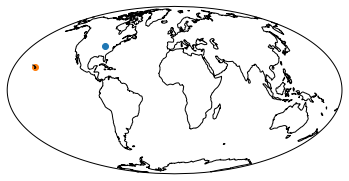

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = cartopy.crs.Mollweide())
champaign = 40.1164, -88.2434
oahu = 19.8968, -155.582
ax.scatter(champaign[1], champaign[0], transform = cartopy.crs.PlateCarree())
ax.scatter(oahu[1], oahu[0], transform = cartopy.crs.PlateCarree())
ax.set_global()
ax.coastlines()

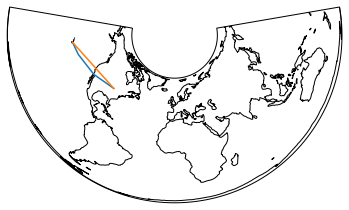

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = cartopy.crs.AlbersEqualArea())
champaign = 40.1164, -88.2434
oahu = 19.8968, -155.582
ax.plot([champaign[1], oahu[1]], [champaign[0], oahu[0]], transform = cartopy.crs.PlateCarree())
ax.plot([champaign[1], oahu[1]], [champaign[0], oahu[0]], transform = cartopy.crs.Geodetic())
ax.set_global()
ax.coastlines()

In [6]:
import pandas as pd

In [7]:
locations = pd.read_csv("/Users/jillnaiman1/spring2019online/week08/data/location.txt", delimiter="\t",
            header = None, names = ["longitude", "latitude", "empty1", "empty2"])

In [8]:
del locations["empty1"], locations["empty2"]

In [9]:
locations

,longitude,latitude
0,-98.683,27.065
1,-98.102,26.938
2,-98.068,26.463
3,-117.110,32.889
4,-107.790,32.532
5,-98.916,32.608
6,-98.079,32.573
7,-97.410,32.557
8,-96.530,32.475
9,-95.756,32.597


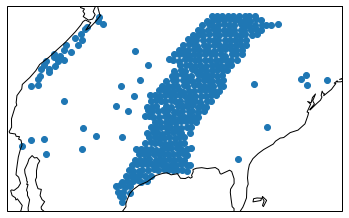

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = cartopy.crs.Mollweide())
ax.scatter(locations["longitude"], locations["latitude"], transform = cartopy.crs.PlateCarree())
#ax.set_global()
ax.coastlines()

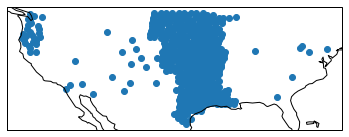

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = cartopy.crs.LambertCylindrical())
ax.scatter(locations["longitude"], locations["latitude"], transform = cartopy.crs.PlateCarree())
ax.coastlines()

In [12]:
import cartopy.io.img_tiles

In [13]:
imagery = cartopy.io.img_tiles.OSM()

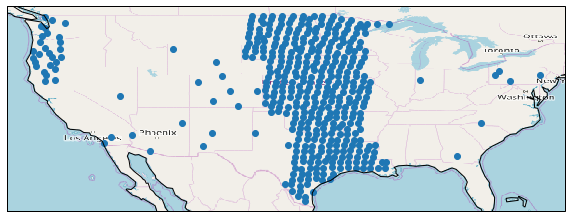

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = cartopy.crs.LambertCylindrical())
ax.scatter(locations["longitude"], locations["latitude"], transform = cartopy.crs.PlateCarree())
ax.add_image(imagery, 4)
ax.coastlines()

In [15]:
seismic = pd.read_csv("/Users/jillnaiman1/spring2019online/week08/data/data_tohoku_norm_transpose.csv",
           header = None)

In [16]:
seismic.shape

(14401, 438)

In [17]:
locations.shape

(438, 2)

In [18]:
3600*4

14400

In [19]:
import ipywidgets

In [20]:
import matplotlib.pyplot as plt


@ipywidgets.interact(station = (0, 437))
def plot(station = 0):
    plt.plot(seismic[station])
    plt.xlabel("Time")
    plt.ylabel("Displacement")
    plt.ylim(-1, 1)

interactive(children=(IntSlider(value=0, description='station', max=437), Output()), _dom_classes=('widget-int…

In [23]:
import bqplot

In [24]:
import ipywidgets

In [25]:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

lines = bqplot.Lines(x = seismic.index.values, y = seismic[0],
                    scales = {'x': x_sc, 'y': y_sc})

x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, orientation = 'vertical')

fig = bqplot.Figure(marks = [lines], axes = [x_ax, y_ax])

slider = ipywidgets.IntSlider(min=0, max=437)
y_sc.min = -1.0
y_sc.max = 1.0
def update_slider(event):
    lines.y = seismic[event['new']]

slider.observe(update_slider, 'value')

display(ipywidgets.VBox([slider, fig]))

In [26]:
import numpy as np

In [27]:
@ipywidgets.interact(station = (0, 437, 1), t = (0, 14400, 1))
def plot(station = 0, t = 0):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(211, projection = cartopy.crs.LambertCylindrical())
    colors = seismic.loc[t]
    ax.scatter(locations["longitude"], locations["latitude"], transform = cartopy.crs.PlateCarree(),
               c = colors)
    ax.coastlines()

    ax = fig.add_subplot(212)
    ax.plot(seismic.index.values, seismic[station])
    ax.set_ylim(-1, 1)

interactive(children=(IntSlider(value=0, description='station', max=437), IntSlider(value=0, description='t', …

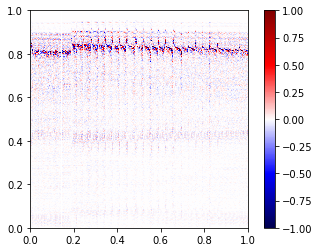

In [28]:
plt.imshow(seismic, extent = [0.0, 1.0, 0.0, 1.0], cmap='seismic')
plt.colorbar()
plt.clim(-1, 1)